### Required Packages

In [38]:
import math
import random
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, fbeta_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

warnings.filterwarnings("ignore")
random.seed(0)

### Define Data

In [39]:
data = pd.read_csv('Datasets/heart.csv')
features = data.iloc[:, 0:-1]
labels = data.iloc[:, -1]

### Data Insights

##### Check Null Values

In [40]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### Check Duplicates

In [41]:
data.duplicated().value_counts()

False    302
True       1
dtype: int64

In [42]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [43]:
data = data.drop_duplicates(keep='first') #inplace=True

In [44]:
data.duplicated().value_counts()

False    302
dtype: int64

##### EDA

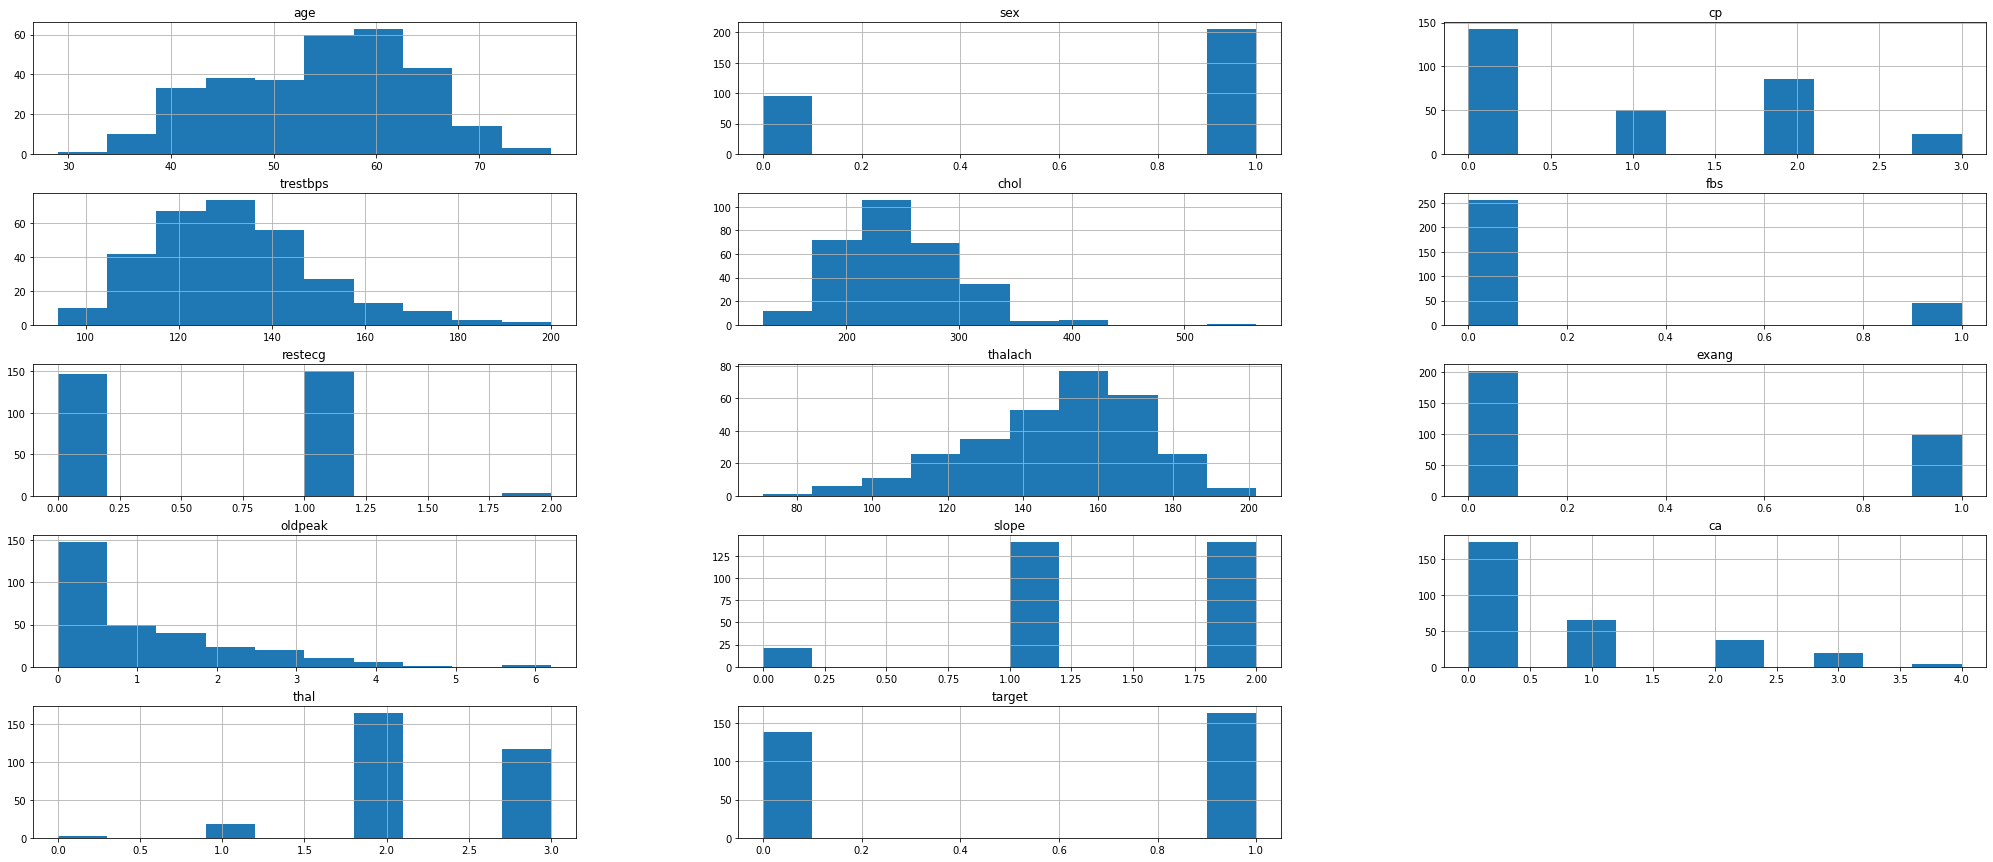

In [45]:
data.hist(figsize=(35,15), layout=(5,3))
plt.show()

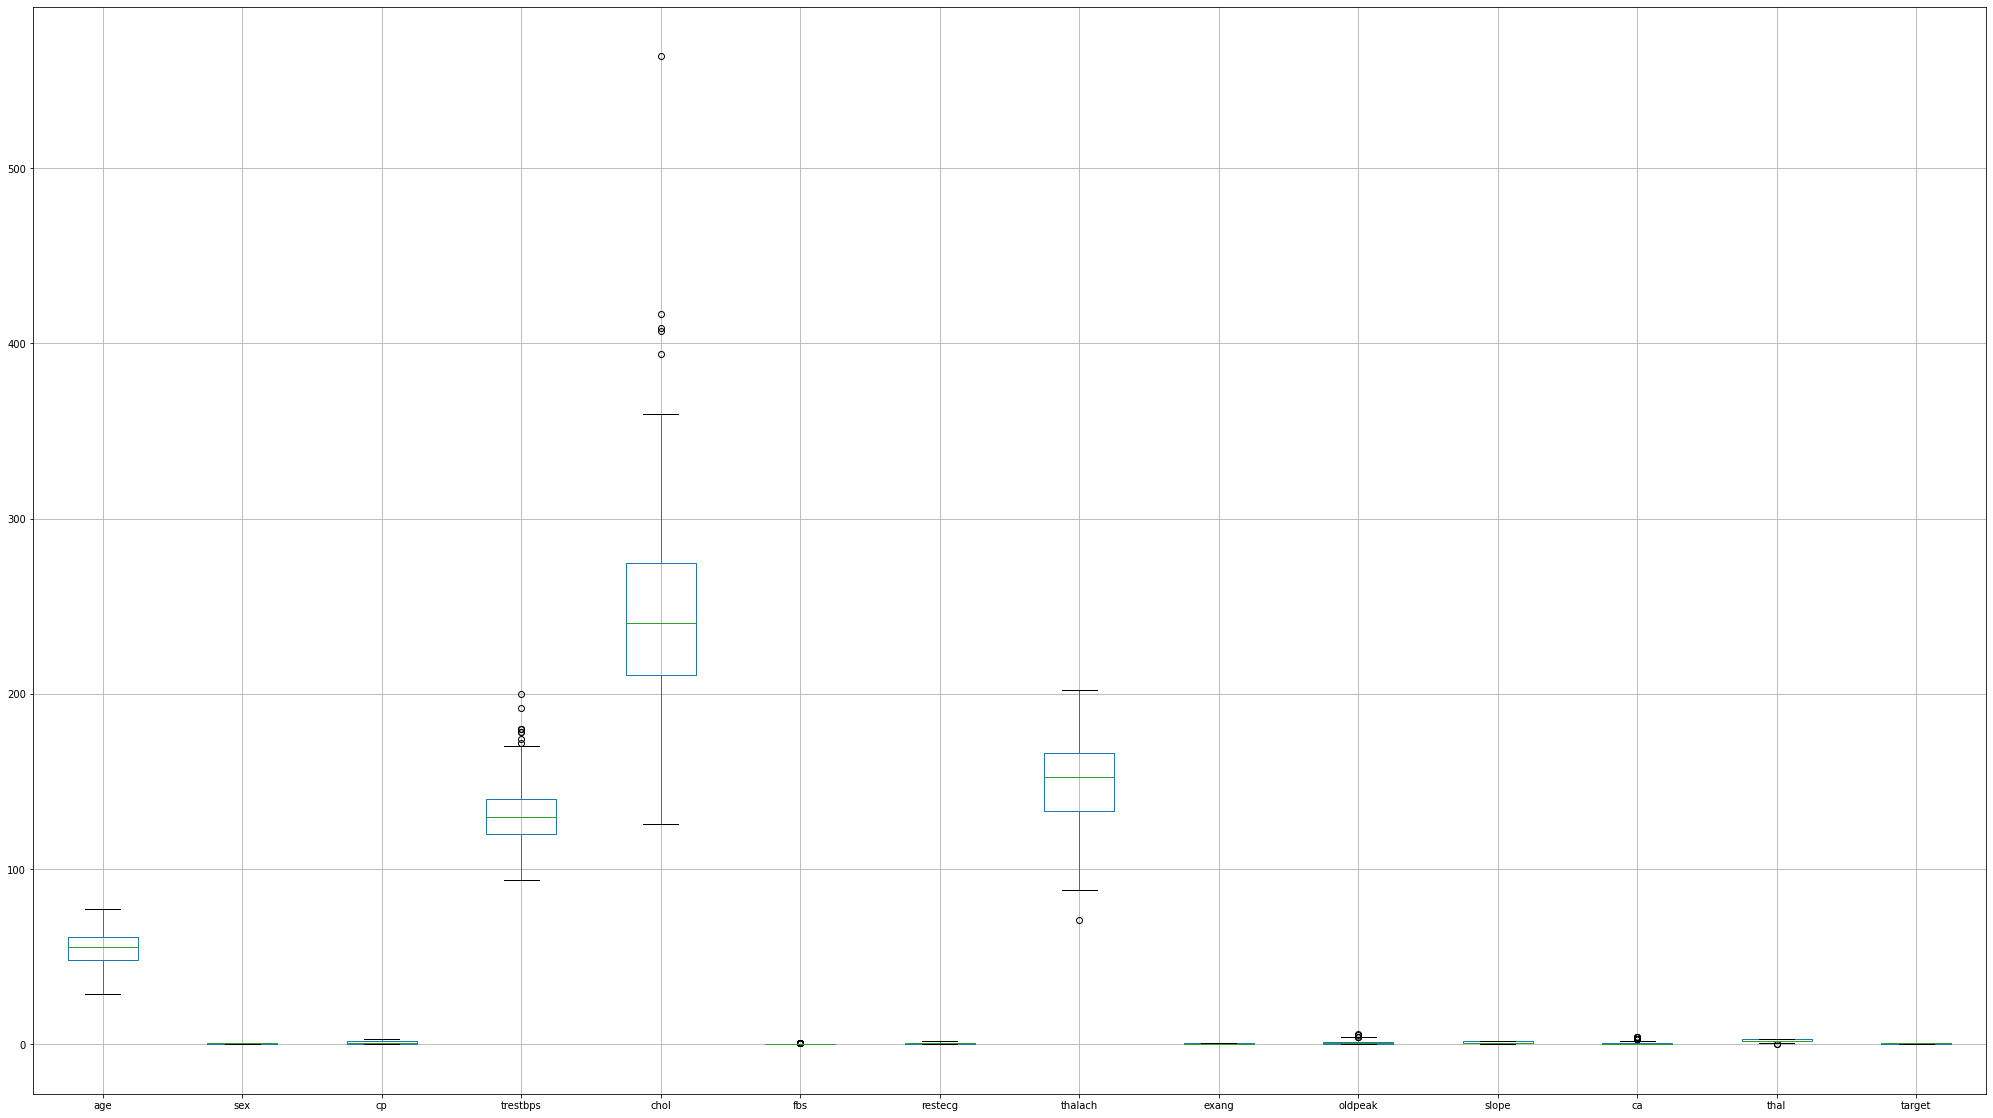

In [46]:
data.boxplot(column=list(data.columns), figsize=(35,20))
plt.show()

##### Correlation

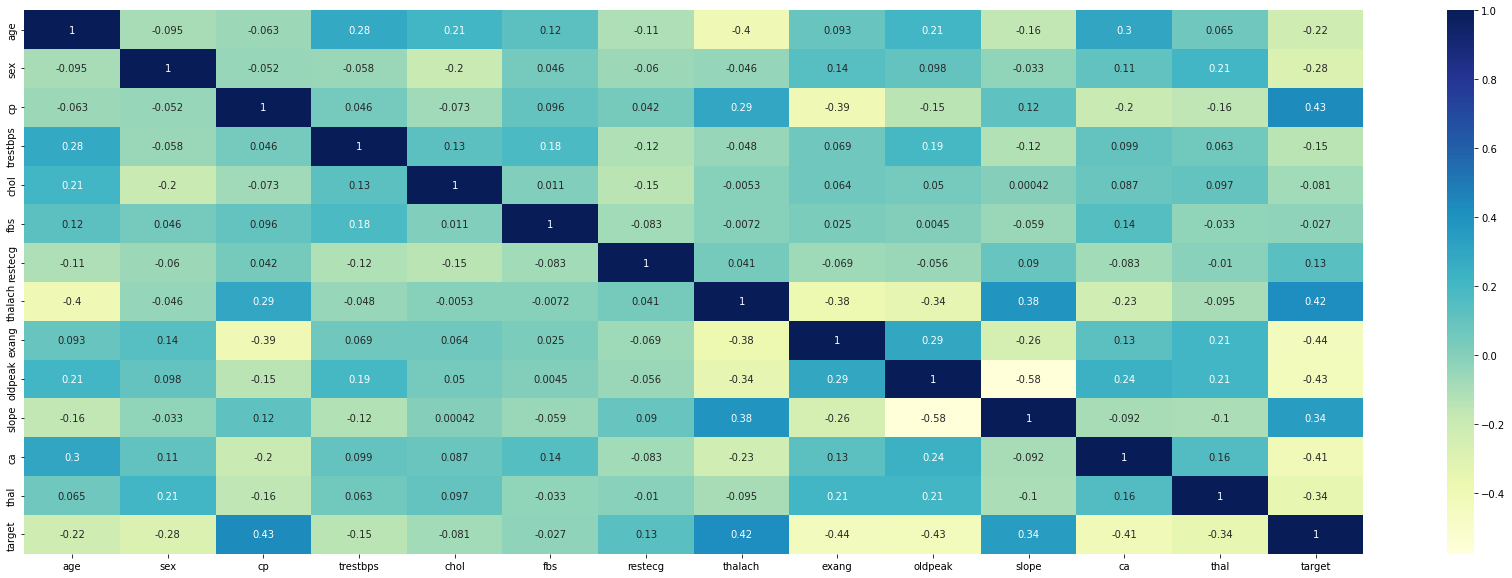

In [47]:
corr = data.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

### Data Transform

In [48]:
col_names = features.columns

sc = StandardScaler()
features = sc.fit_transform(features)

In [49]:
features = pd.DataFrame(features, columns=col_names)

### Split Data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.1, random_state=42, shuffle=True)

### Logistic Regression

In [64]:
def sigmoid(pred):
    sig = 1 / (1 + np.exp(-pred))
    return sig

def Logistic_Regresssion(X, Y, lr=0.01, iterations=20000, threshold=0.0001):
    
    weights = np.zeros(data.shape[1]-1)
    costs = np.zeros((iterations, 1))
    i = 0
    for i in range(iterations):
    
        y_pred = X @ weights    
        cost0 = Y.T @ np.log(sigmoid(y_pred))
        cost1 = (1-Y).T @ np.log(1-sigmoid(y_pred))
        
        total_cost = (-1/len(Y)) * ((cost0 + cost1))
        
        costs[i] = total_cost
        
        error = sigmoid(y_pred) - Y
        
        gradient = np.dot(X.T, error) / (len(Y))
        weights = weights - lr * gradient
        
        if i > 0:
            if np.abs(costs[i-1]- costs[i]) <= threshold:
                print("Takes {} iterations".format((i+1)))
                break
    return weights, costs, i

In [65]:
final_weights, costs, i = Logistic_Regresssion(X_train, y_train)

Takes 497 iterations


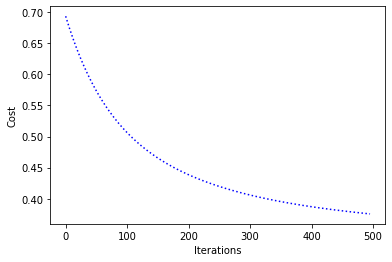

In [66]:
plt.plot(np.arange(0, i), costs[0:i, :], c='b', linestyle='dotted')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [67]:
Y_Pred = np.dot(X_test, final_weights)
result = pd.DataFrame({'Y_Pred': sigmoid(Y_Pred).round(), 'Actual_Y': y_test})

In [68]:
Y_Pred_train = np.dot(X_train, final_weights)
result_train = pd.DataFrame({'Y_Pred': sigmoid(Y_Pred_train).round(), 'Actual_Y': y_train})
f1_score(result_train['Actual_Y'], result_train['Y_Pred'])*100

86.55737704918033

In [69]:
f1_score(result['Actual_Y'], result['Y_Pred'])*100

85.71428571428571

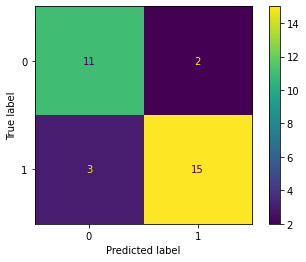

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result['Y_Pred'], result.Actual_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Logistic Regression using Sklearn

In [71]:
classifier = LogisticRegression(random_state=42)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=42)

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
f1_score(y_test, y_pred)*100

82.35294117647058

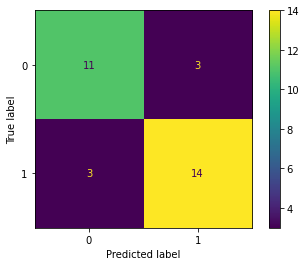

In [74]:
cm = confusion_matrix(y_pred, result.Actual_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()